In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import random
from imblearn.over_sampling import SMOTE


In [11]:

data=pd.read_csv(r"C:\Users\bless\AML_assignments\Assignment4\Prepro_data.csv", header=0)
#data=pd.read_csv(r"C:\Users\shubh\Downloads\Prepro_data.csv", header=0)
data= data.drop(["Unnamed: 0"],axis=1)
data= data.T
data.columns=data.iloc[0,:]
data=data.drop(["Genes"],axis=0)
data.reset_index(inplace=True)
#print(data)
data.rename(columns={data.columns[0]: 'Gene'}, inplace=True)
data['Gene'] = data['Gene'].apply(lambda x: 0 if x.startswith(('HD', 'Control')) else 1)
#print(data)


In [12]:

#data
#Preparing X and Y dataset from the data    
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [13]:
X

Genes,ENSG00000005249,ENSG00000005961,ENSG00000008988,ENSG00000019582,ENSG00000034510,ENSG00000035403,ENSG00000071082,ENSG00000082781,ENSG00000089009,ENSG00000089157,...,ENSG00000197958,ENSG00000198034,ENSG00000198858,ENSG00000204472,ENSG00000204628,ENSG00000213741,ENSG00000231389,ENSG00000231500,ENSG00000233927,ENSG00000235162
0,1466,9287,1434,3473,977,20224,1454,533,594,1339,...,1372,1574,186,794,2031,1411,370,3171,272,236
1,2089,22389,566,2112,302,27631,407,967,199,365,...,326,558,295,336,941,265,155,673,85,492
2,1794,21114,578,1860,390,22596,470,778,236,437,...,372,450,339,340,708,272,303,901,100,424
3,577,2382,323,515,284,3697,438,134,119,323,...,306,372,75,153,440,374,110,974,142,144
4,1572,16471,454,1687,300,25241,337,514,148,420,...,265,407,279,119,672,253,137,767,79,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,4932,6400,379,340,183,3979,57,1755,64,225,...,373,249,862,216,260,111,162,646,99,704
281,11320,34993,278,424,220,14125,180,3619,86,213,...,182,217,1407,305,650,121,196,494,80,2906
282,17067,48883,260,498,328,20160,300,4581,215,330,...,329,253,2345,106,508,138,124,619,182,2809
283,7566,6229,300,319,182,8721,377,1393,232,440,...,708,493,1123,234,1159,207,40,892,179,503


In [14]:
Y.value_counts()

1    231
0     54
Name: Gene, dtype: int64

In [15]:
#Removing imbalance in data
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
Y.value_counts()

1    231
0    231
Name: Gene, dtype: int64

In [16]:
X.shape

(462, 90)

In [17]:
#Scaling X values
scaler = StandardScaler()
X_array = X.values
scaled_X_array = scaler.fit_transform(X_array)
scaled_X = pd.DataFrame(scaled_X_array, columns=X.columns)


In [18]:
scaled_X

Genes,ENSG00000005249,ENSG00000005961,ENSG00000008988,ENSG00000019582,ENSG00000034510,ENSG00000035403,ENSG00000071082,ENSG00000082781,ENSG00000089009,ENSG00000089157,...,ENSG00000197958,ENSG00000198034,ENSG00000198858,ENSG00000204472,ENSG00000204628,ENSG00000213741,ENSG00000231389,ENSG00000231500,ENSG00000233927,ENSG00000235162
0,-0.127494,0.007923,0.932967,0.356156,0.730698,1.182581,0.302811,-0.044878,0.432259,0.378009,...,0.488505,0.968574,-0.376846,1.009253,0.454581,0.907211,0.542368,0.510015,0.034621,-0.309237
1,0.039366,1.361223,-0.327960,-0.050356,-0.620611,1.935217,-0.629492,0.421211,-0.493391,-0.542709,...,-0.608784,-0.275852,-0.132650,-0.086329,-0.279334,-0.651908,-0.234481,-0.632434,-0.777534,0.188099
2,-0.039644,1.229529,-0.310528,-0.125625,-0.444440,1.423603,-0.573394,0.218237,-0.406684,-0.474648,...,-0.560529,-0.408134,-0.034075,-0.076760,-0.436217,-0.642385,0.300280,-0.528160,-0.712388,0.055994
3,-0.365597,-0.705292,-0.680962,-0.527358,-0.656646,-0.496754,-0.601888,-0.473379,-0.680864,-0.582412,...,-0.629765,-0.503671,-0.625522,-0.524083,-0.616666,-0.503615,-0.397077,-0.494773,-0.529979,-0.487966
4,-0.099103,0.749955,-0.490661,-0.177297,-0.624615,1.692366,-0.691824,-0.065283,-0.612905,-0.490718,...,-0.672775,-0.460802,-0.168495,-0.605414,-0.460457,-0.668234,-0.299519,-0.589444,-0.803593,-0.336435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,-0.403139,-0.699056,-0.492067,-0.513922,-0.269870,-0.716846,-0.316267,-0.391126,-0.287724,-0.542765,...,-0.380495,-0.574577,-0.610604,-0.634685,-0.603001,-0.205643,-0.655112,-0.414675,-0.166089,-0.580254
458,-0.470060,-0.851233,0.704714,1.060772,1.554786,-0.647926,1.247434,-0.516616,0.621563,0.707444,...,0.803217,0.876598,-0.642461,0.759020,0.494591,1.643001,0.633961,1.326409,2.047830,-0.640797
459,-0.347268,-0.661309,-0.321857,-0.157004,-0.551200,-0.400025,-0.479530,-0.467588,-0.290465,-0.386827,...,-0.264005,-0.285316,-0.610894,-0.533034,-0.437081,-0.407840,-0.310826,-0.464929,-0.439697,-0.617564
460,-0.305203,-0.242094,0.862743,2.722761,0.632481,-0.591209,0.763589,-0.284261,1.086912,1.698589,...,0.918658,0.990926,0.208526,1.372297,1.641272,0.305471,2.597932,1.186270,0.547529,-0.179181


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y, test_size=1/3, stratify=Y, random_state=8)

In [20]:
n_estimators_list = [50, 55, 150, 500, 750, 1000, 1500]
for n_estimators in n_estimators_list:
    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_features=8, n_jobs=-1, random_state=1)

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, Y_train)

    # Predict probabilities on the test data
    probs = rf_classifier.predict_proba(X_test)

    # Extract the probabilities of the positive class
    positive_class_probs = probs[:, 1]

    # Calculate the AUC score
    auc_score = roc_auc_score(Y_test, positive_class_probs)

    print('Number of estimators: ', n_estimators)
    print('AUC score: ', auc_score)
    print('---------------------------------------------------------')

Number of estimators:  50
AUC score:  0.9617136110642605
---------------------------------------------------------
Number of estimators:  55
AUC score:  0.9623039298363973
---------------------------------------------------------
Number of estimators:  150
AUC score:  0.9636532298869962
---------------------------------------------------------
Number of estimators:  500
AUC score:  0.9628942486085343
---------------------------------------------------------
Number of estimators:  750
AUC score:  0.9628942486085343
---------------------------------------------------------
Number of estimators:  1000
AUC score:  0.9634002361275089
---------------------------------------------------------
Number of estimators:  1500
AUC score:  0.9637375611401585
---------------------------------------------------------


In [21]:
# Set parameters for the extimator
estimator = RandomForestClassifier(n_estimators=55, max_features=8, n_jobs=-1, random_state=5)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [22]:
probabilities = cross_val_predict(estimator, X_train, Y_train, cv=kfold, method='predict_proba') 

In [23]:
probabilities.shape

(308, 2)

In [24]:
Y_train.shape

(308,)

In [25]:
Y_test.shape

(154,)

In [26]:
Y_pred = [0 if p[0] > 0.5 else 1 for p in probabilities]

In [27]:
#train accuracy after cross validation
accuracy_train = accuracy_score(Y_train, Y_pred)
accuracy_train

0.9448051948051948

In [28]:
cm = confusion_matrix(Y_train, Y_pred)

In [29]:
df_cm = pd.DataFrame(cm, index=["Actual Healthy", "Actual Cancer"], columns=["Predicted Healthy", "Predicted Cancer"])
print(df_cm.T)

                   Actual Healthy  Actual Cancer
Predicted Healthy             148             11
Predicted Cancer                6            143


In [30]:
forest = estimator.fit(X_train, Y_train)

In [31]:
test_prob = forest.predict_proba(X_test)

In [32]:
Y_pred_test = [0 if p[0] > 0.5 else 1 for p in test_prob]

In [33]:
#test accuracy after cross validation
accuracy_test = accuracy_score(Y_test, Y_pred_test)
accuracy_test

0.9090909090909091

In [34]:
cm = confusion_matrix(Y_test, Y_pred_test)

In [35]:
df_cm = pd.DataFrame(cm, index=["Actual Healthy", "Actual Cancer"], columns=["Predicted Healthy", "Predicted Cancer"])
print(df_cm.T)

                   Actual Healthy  Actual Cancer
Predicted Healthy              71              8
Predicted Cancer                6             69


0.9886996120762355
0.9572440546466521


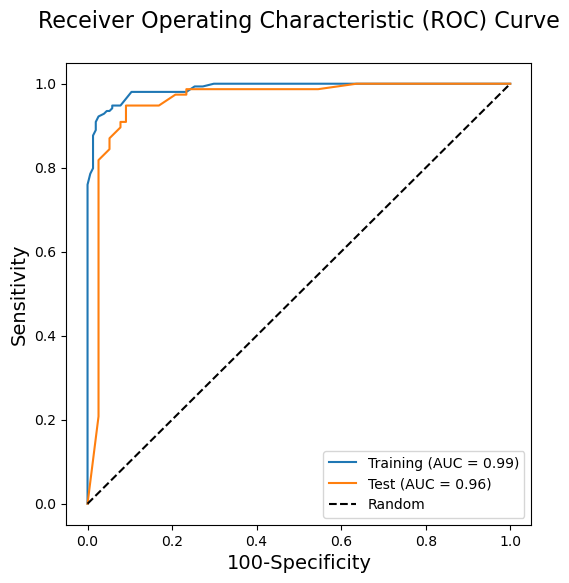

In [36]:
Train_prob=probabilities
kk=[]
for i in Y_train:
    #print(i)
    kk.append(i)
#print(kk)
fpr_train,tpr_train,threshold_train=roc_curve(kk,Train_prob[:,1])
auc_score = auc(fpr_train, tpr_train)
print(auc_score)

Test_prob=test_prob
ll=[]
for i in Y_test:
    #print(i)
    ll.append(i)
#print(kk)
fpr_test,tpr_test,threshold_test=roc_curve(ll,Test_prob[:,1])
auc_scorer = auc(fpr_test,tpr_test)
print(auc_scorer)

fig, ax = plt.subplots(figsize=(6,6),dpi=100)
plt.plot(fpr_train, tpr_train, label='Training (AUC = %0.2f)' % auc_score)
plt.plot(fpr_test,tpr_test, label='Test (AUC = %0.2f)' % auc_scorer)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('100-Specificity', fontsize=14)
plt.ylabel('Sensitivity', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve\n', fontsize=16)
plt.legend(loc='lower right')
plt.show()
#y['Gene'] = pd.to_numeric(y['Gene'], errors='coerce')
#y=y['Gene'].values.flatten()
#second_column = y.il.voc[:, 1]

#y.stack().reset_index(drop=True)
#y.values

#yy=yy.ravel()

In [37]:
average_accuracy_arr = [[0,0]]

for i in range(1,X.shape[1]):
    total_accuracy = 0
    for j in range(10):  # Perform 10 iterations
        selected_columns = random.sample(range(X.shape[1]-1), i)  # Randomly select i columns
        X_temp = X.iloc[:,selected_columns]
        X_train,X_test,Y_train,Y_test=train_test_split(X_temp,Y, test_size=1/3, stratify=Y, random_state=8)
        probabilities = cross_val_predict(estimator, X_train, Y_train, cv=kfold, method='predict_proba') 
        Y_pred = [0 if p[0] > 0.5 else 1 for p in probabilities]
        accuracy_train = accuracy_score(Y_train, Y_pred)
        total_accuracy = total_accuracy+accuracy_train
        #print(accuracy_train)
    average_accuracy_arr.append([i,total_accuracy/10])
    #print(average_accuracy_arr,"avg")
    print("progress : ",i,"/",X.shape[1]+1)


progress :  1 / 91
progress :  2 / 91
progress :  3 / 91
progress :  4 / 91
progress :  5 / 91
progress :  6 / 91
progress :  7 / 91
progress :  8 / 91
progress :  9 / 91
progress :  10 / 91
progress :  11 / 91
progress :  12 / 91
progress :  13 / 91
progress :  14 / 91
progress :  15 / 91
progress :  16 / 91
progress :  17 / 91
progress :  18 / 91
progress :  19 / 91
progress :  20 / 91
progress :  21 / 91
progress :  22 / 91
progress :  23 / 91
progress :  24 / 91
progress :  25 / 91
progress :  26 / 91
progress :  27 / 91
progress :  28 / 91
progress :  29 / 91
progress :  30 / 91
progress :  31 / 91
progress :  32 / 91
progress :  33 / 91
progress :  34 / 91
progress :  35 / 91
progress :  36 / 91
progress :  37 / 91
progress :  38 / 91
progress :  39 / 91
progress :  40 / 91
progress :  41 / 91
progress :  42 / 91
progress :  43 / 91
progress :  44 / 91
progress :  45 / 91
progress :  46 / 91
progress :  47 / 91
progress :  48 / 91
progress :  49 / 91
progress :  50 / 91
progress 

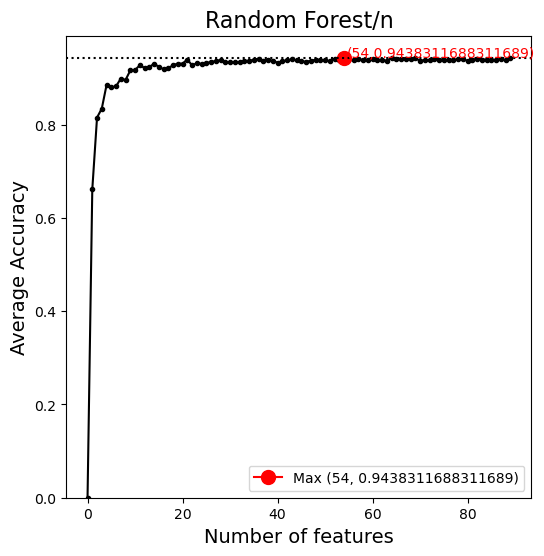

In [38]:
# Separate x and y values from the data
x = [row[0] for row in average_accuracy_arr]
y = [row[1] for row in average_accuracy_arr]

# Find the index of the maximum value
max_index = y.index(max(y))
max_x = x[max_index]
max_y = y[max_index]

fig, ax = plt.subplots(figsize=(6,6),dpi=100)
# Plot the line graph
plt.plot(x, y, marker='.', linestyle='-', color='black')

# Highlight the maximum point
plt.plot(max_x, max_y, marker='o', markersize=10, color='r', label=f'Max ({max_x}, {max_y})')
plt.annotate(f'({max_x},{max_y})', xy=(max_x, max_y), xytext=(max_x+0.5, max_y), color='r')

# Add a dotted line on the y-axis at the maximum value
plt.axhline(y=max_y, linestyle=':', color='black')
plt.ylim(0)

# Set labels and title
plt.xlabel('Number of features', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.title('Random Forest/n', fontsize=16)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [39]:
for i in range(1,X.shape[1]):
    print(i)
    selected_columns = random.sample(range(X.shape[1]-1), i)  # Randomly select i columns
    selected_columns

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [40]:
importance=forest.feature_importances_
feat=pd.DataFrame({'Features': X.columns,'Importance': importance})
feat=feat.sort_values('Importance',ascending=False)
#Top 20 features for the random
feat=feat.head(20)
print(feat)
#When compared with the previous study of Zhang, the metabolities which were found to be common
#were:-ENSG00000177600(3rd metabolite in Zhang study,5th in this project),ENSG00000168028
#(5th in Zhang, 8th here),ENSG00000142676(7th Zhang,11th here),ENSG00000163682(13th Zhang,2nd here),
#ENSG00000071082(14th Zhang,15th here),ENSG00000089009(18th Zhang, 1st here)

#6 metabolities were found to be similar, when Zhnag study and this project was compared.



           Features  Importance
5   ENSG00000035403    0.069817
8   ENSG00000089009    0.065820
60  ENSG00000163682    0.062403
1   ENSG00000005961    0.049758
17  ENSG00000108846    0.036546
58  ENSG00000162368    0.034005
0   ENSG00000005249    0.032523
18  ENSG00000109475    0.031809
63  ENSG00000166501    0.029523
71  ENSG00000177600    0.028653
89  ENSG00000235162    0.027162
65  ENSG00000168028    0.022498
67  ENSG00000171858    0.022446
23  ENSG00000114391    0.022027
44  ENSG00000142937    0.020763
43  ENSG00000142676    0.018829
10  ENSG00000100316    0.018054
38  ENSG00000137154    0.015644
79  ENSG00000197956    0.014910
59  ENSG00000162909    0.014692
